In [1]:
from PyParticle.population import build_population
import numpy as np
import warnings
from PyParticle.viz.style import StyleManager, Theme
from PyParticle.viz.builder import build_plotter
import matplotlib.pyplot as plt
#%matplotlib inline  


warnings.filterwarnings("ignore")

lognormal_cfg = {"type": "binned_lognormals",
                 "N": [1e9],
                 "GMD": [100e-9],
                 "GSD": [1.6],
                 "N_bins": 50,
                 "aero_spec_names":[["BC", "SO4"]],
                 "aero_spec_fracs":[[0.8, 0.2]],
                 "species_modifications": {'SO4': {'n_550': 1.55, 'k_550': 0.00,
                                                   'alpha_n': 0.00, 'alpha_k': 0.0},
                                           'BC': {'n_550': 1.95, 'k_550': 0.79,
                                                  'alpha_n': 0.00, 'alpha_k': 0.0}}
}


# Build underlying particle population
lognorm_pop = build_population(lognormal_cfg)


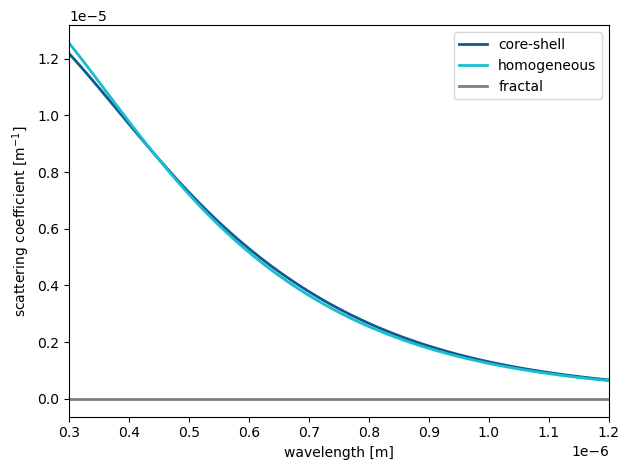

In [2]:
wvl_grid = np.linspace(300e-9, 1200e-9, 100)
rh = 0.0

mgr = StyleManager(Theme(), deterministic=True)
series = [
    {"key": "1", "population": lognorm_pop, "label": r"core-shell", "var_cfg": {"morphology": "core-shell", "wvl_grid": wvl_grid, "rh_grid": [rh]}},
    {"key": "50", "population": lognorm_pop, "label": r"homogeneous", "var_cfg": {"morphology": "homogeneous", "wvl_grid": wvl_grid, "rh_grid": [rh]}},
    {"key": "100", "population": lognorm_pop, "label": r"fractal", "var_cfg": {"morphology": "fractal", "wvl_grid": wvl_grid, "rh_grid": [rh]}}
]
line_styles = mgr.plan("line", [s["key"] for s in series])


fig, ax = plt.subplots()
for s in series:
    cfg = {"varname": "b_scat",
            "var_cfg": s["var_cfg"],  # simple case: single x
            "style": line_styles[s["key"]],
    }
    plotter = build_plotter("state_line", cfg)
    plotter.plot(s["population"], ax, label=s["label"])
ax.legend(); fig.tight_layout()
plt.show()